# Extracting keywords and the corresponing raw waveforms

# 1. Loading what needs to be loaded

In [29]:
import pandas as pd
import os
from audiolabel import LabelManager
import librosa
import librosa.display as libdisp
import librosa.core as libcore
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import pandas as pd

In [2]:
DATADIR = "/data/Dropbox/Data/Supreme_Court_Audio/Oyez_vowels/FAVE/oyez_full"
WORKDIR = "/data/WorkData/ideology_from_audio/RESULTS"

In [3]:
# Loading the word-count data
words = pd.read_csv(WORKDIR+"/listwords.txt", sep=" ", header=None) 
words.columns = ["Word", "Count"]
words.head()

,Word,Count
0,BECAUSE,18314
1,ABOUT,15571
2,JUSTICE,14735
3,UNDER,13810
4,QUESTION,13101


In [9]:
words[words['Word']=='SCIENCE']

,Word,Count
3337,SCIENCE,61
32080,SCIENCE,61


Based on this, we are going to focus on the following words:

In [10]:
used_words = list(map(lambda s: s.upper(), ['Justice', 'Honor', 'Federal', 'Congress', 
              'Government', 'Evidence', 'Argument', 'Issue', 'Science', 'Taxation']))
used_words

['JUSTICE',
 'HONOR',
 'FEDERAL',
 'CONGRESS',
 'GOVERNMENT',
 'EVIDENCE',
 'ARGUMENT',
 'ISSUE',
 'SCIENCE',
 'TAXATION']

In [11]:
# Loading the people data
people = pd.read_csv(WORKDIR+"/listpeople.txt", header=None) 
people.columns = ["Name"]
people.head()

,Name
0,Aaron L Weisman
1,Aaron M Panner
2,Aj Kramer
3,Alan Gura
4,Alexander W Ross Jr


# 2. Developing the script on the 1998 data

In [12]:
TEXTGRIDDIR = DATADIR + "/1998/aligned"
MP3DIR = DATADIR + "/1998/mp3s"

In [13]:
textlst = os.listdir(TEXTGRIDDIR)
mp3lst = os.listdir(MP3DIR)

In [14]:
# Constructing the filenames that have both a corresponding aligned TextGrid and mp3
filenames = []
for fn in mp3lst:
    trunc = fn.split(".")[0]
    if any(trunc in s for s in textlst):
        filenames.append(trunc)

print("Number of aligned TextGrid files with Audio: "+str(len(filenames)))

Number of aligned TextGrid files with Audio: 38


## 2.1. Extracting the words

In [15]:
# Loading the first TextGrid file into a label manager
lm = LabelManager(from_file = TEXTGRIDDIR + "/" + filenames[0] + ".TextGrid", from_type='praat')

In [18]:
# Select the word_tiers to distinguish the phoneme tiers
word_tiers = [name for name in lm.names if name.split("-")[1].strip() == 'word']
# Recovering the name of the speaker for each tier
word_tiers[0].split("-")[0].strip()

'sandra day oconnor'

In [23]:
# Look at how a tier looks like
lm.tier(1)

IntervalTier([Label( t1=0.0000, t2=62.4910, text='b'sp'' ),Label( t1=62.4910, t2=62.8010, text='b'BUT'' ),Label( t1=62.8010, t2=62.9510, text='b"WE'VE"' ),Label( t1=62.9510, t2=63.4210, text='b'ALSO'' ),Label( t1=63.4210, t2=63.4440, text='b'sp'' ),Label( t1=63.4440, t2=63.4640, text='b'sp'' ),Label( t1=63.4640, t2=63.9240, text='b'SAID'' ),Label( t1=63.9240, t2=64.0430, text='b'THAT'' ),Label( t1=64.0430, t2=64.1630, text='b'IT'' ),Label( t1=64.1630, t2=64.1940, text='b'sp'' ),Label( t1=64.1940, t2=64.4440, text='b'CAN'' ),Label( t1=64.4440, t2=64.8530, text='b'BE'' ),Label( t1=64.8530, t2=64.8840, text='b'sp'' ),Label( t1=64.8840, t2=65.0540, text='b'IT'' ),Label( t1=65.0540, t2=65.0830, text='b'sp'' ),Label( t1=65.0830, t2=65.6840, text='b'CAN'' ),Label( t1=65.6840, t2=66.3840, text='b'sp'' ),Label( t1=66.3840, t2=67.2240, text='b'INDIRECTLY'' ),Label( t1=67.2240, t2=67.8040, text='b'sp'' ),Label( t1=67.8040, t2=68.0240, text='b'BE'' ),Label( t1=68.0240, t2=68.1040, text='b'A'' ),Label( t1=68.1040, t2=68.7140, text='b'RECIPIENT'' ),Label( t1=68.7140, t2=511.8460, text='b'sp'' ),Label( t1=511.8460, t2=511.9060, text='b'sp'' ),Label( t1=511.9060, t2=512.2560, text='b'MR'' ),Label( t1=512.2560, t2=512.8250, text='b'ROBERTS'' ),Label( t1=512.8250, t2=513.1460, text='b'THERE'' ),Label( t1=513.1460, t2=513.3160, text='b'sp'' ),Label( t1=513.3160, t2=513.8160, text='b'UH'' ),Label( t1=513.8160, t2=514.0260, text='b'sp'' ),Label( t1=514.0260, t2=514.4460, text='b'IS'' ),Label( t1=514.4460, t2=515.1960, text='b'SOME'' ),Label( t1=515.1960, t2=515.3460, text='b'sp'' ),Label( t1=515.3460, t2=515.5460, text='b'UH'' ),Label( t1=515.5460, t2=515.5760, text='b'sp'' ),Label( t1=515.5760, t2=516.0760, text='b'ARGUMENT'' ),Label( t1=516.0760, t2=516.2660, text='b'ON'' ),Label( t1=516.2660, t2=516.4460, text='b'THE'' ),Label( t1=516.4460, t2=516.6960, text='b'OTHER'' ),Label( t1=516.6960, t2=517.1960, text='b'SIDE'' ),Label( t1=517.1960, t2=517.2460, text='b'sp'' ),Label( t1=517.2460, t2=517.4360, text='b'THAT'' ),Label( t1=517.4360, t2=517.4860, text='b'sp'' ),Label( t1=517.4860, t2=517.7260, text='b'WELL'' ),Label( t1=517.7260, t2=517.9960, text='b'ALL'' ),Label( t1=517.9960, t2=518.3460, text='b'THIS'' ),Label( t1=518.3460, t2=518.3650, text='b'sp'' ),Label( t1=518.3650, t2=518.4450, text='b'sp'' ),Label( t1=518.4450, t2=518.7050, text='b"DOESN'T"' ),Label( t1=518.7050, t2=519.0250, text='b'MATTER'' ),Label( t1=519.0250, t2=519.4750, text='b'ANYWAY'' ),Label( t1=519.4750, t2=520.0340, text='b'BECAUSE'' ),Label( t1=520.0340, t2=520.1950, text='b'THE'' ),Label( t1=520.1950, t2=520.3250, text='b'N'' ),Label( t1=520.3250, t2=520.5650, text='b'C'' ),Label( t1=520.5650, t2=520.8550, text='b'DOUBLE'' ),Label( t1=520.8550, t2=521.0350, text='b'A'' ),Label( t1=521.0350, t2=521.2850, text='b'GETS'' ),Label( t1=521.2850, t2=521.5850, text='b'MONEY'' ),Label( t1=521.5850, t2=521.6150, text='b'sp'' ),Label( t1=521.6150, t2=521.8050, text='b'FROM'' ),Label( t1=521.8050, t2=521.8650, text='b'THE'' ),Label( t1=521.8650, t2=522.3650, text='b'NATIONAL'' ),Label( t1=522.3650, t2=522.5750, text='b'YOUTH'' ),Label( t1=522.5750, t2=523.0750, text='b'SPORTS'' ),Label( t1=523.0750, t2=523.0950, text='b'sp'' ),Label( t1=523.0950, t2=523.8650, text='b'PROGRAM'' ),Label( t1=523.8650, t2=523.9250, text='b'sp'' ),Label( t1=523.9250, t2=524.3550, text='b'FUND'' ),Label( t1=524.3550, t2=525.1450, text='b'sp'' ),Label( t1=525.1450, t2=525.3450, text='b'AS'' ),Label( t1=525.3450, t2=525.4050, text='b'A'' ),Label( t1=525.4050, t2=525.8750, text='b'DIRECT'' ),Label( t1=525.8750, t2=525.9450, text='b'sp'' ),Label( t1=525.9450, t2=526.8040, text='b'RECIPIENT'' ),Label( t1=526.8040, t2=526.9640, text='b'sp'' ),Label( t1=526.9640, t2=526.9840, text='b'sp'' ),Label( t1=526.9840, t2=527.4440, text='b'sp'' ),Label( t1=527.4440, t2=527.7240, text='b'NOW'' ),Label( t1=527.7240, t2=527.7840, text='b'sp'' ),Label( t1=527.7840, t2=527.9530, text='b'DO'' ),Label( t1=527.9530, t2=528.143

In [24]:
# Getting fourth label in tier 1
lm.tier(1)[3]

Label( t1=62.9510, t2=63.4210, text='b'ALSO'' )

In [26]:
# Getting the time interval and pronounced word for this label
t1= lm.tier(1)[3].t1
t2= lm.tier(1)[3].t2
text = lm.tier(1)[3].text
t1, t2, text

(62.951, 63.421, 'ALSO')

In [22]:
# List the words appearing in the particular tier
words = []
for i in range(len(lm.tier(word_tiers[0]))):
    words.append(lm.tier(word_tiers[0])[i].text)
words

['sp',
 'BUT',
 "WE'VE",
 'ALSO',
 'sp',
 'sp',
 'SAID',
 'THAT',
 'IT',
 'sp',
 'CAN',
 'BE',
 'sp',
 'IT',
 'sp',
 'CAN',
 'sp',
 'INDIRECTLY',
 'sp',
 'BE',
 'A',
 'RECIPIENT',
 'sp',
 'sp',
 'MR',
 'ROBERTS',
 'THERE',
 'sp',
 'UH',
 'sp',
 'IS',
 'SOME',
 'sp',
 'UH',
 'sp',
 'ARGUMENT',
 'ON',
 'THE',
 'OTHER',
 'SIDE',
 'sp',
 'THAT',
 'sp',
 'WELL',
 'ALL',
 'THIS',
 'sp',
 'sp',
 "DOESN'T",
 'MATTER',
 'ANYWAY',
 'BECAUSE',
 'THE',
 'N',
 'C',
 'DOUBLE',
 'A',
 'GETS',
 'MONEY',
 'sp',
 'FROM',
 'THE',
 'NATIONAL',
 'YOUTH',
 'SPORTS',
 'sp',
 'PROGRAM',
 'sp',
 'FUND',
 'sp',
 'AS',
 'A',
 'DIRECT',
 'sp',
 'RECIPIENT',
 'sp',
 'sp',
 'sp',
 'NOW',
 'sp',
 'DO',
 'WE',
 'DEAL',
 'WITH',
 'sp',
 'THAT',
 'sp',
 'QUESTION',
 'HERE',
 'OR',
 'WHAT',
 'sp',
 'sp',
 'AND',
 'IS',
 'sp',
 'sp',
 'sp',
 'THAT',
 'sp',
 'IS',
 'THAT',
 'A',
 'FEDERALLY',
 'sp',
 'CONSTITUTED',
 'sp',
 'FUND',
 'sp',
 'sp',
 'AND',
 'sp',
 'THE',
 'ALLEGATION',
 'IS',
 'THAT',
 'SOMEHOW',
 'THE',
 'WA

## 2.2. Extracting the audio

In [31]:
# Load the first audiofile
filename = MP3DIR + "/" + filenames[0]+".mp3"
x, sampling_rate = librosa.load(filename)

In [32]:
# Timestamp it
T = x.size / sampling_rate
dt = 1 / sampling_rate
t = np.r_[0:T:dt]

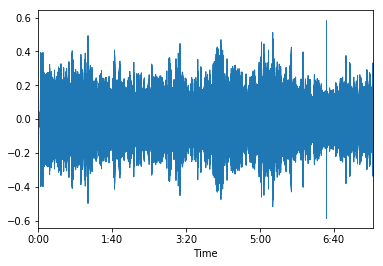

In [37]:
# Visualize amplitudes with the given librosa tool
librosa.display.waveplot(x[:10000000], sr=sampling_rate)
plt.show()

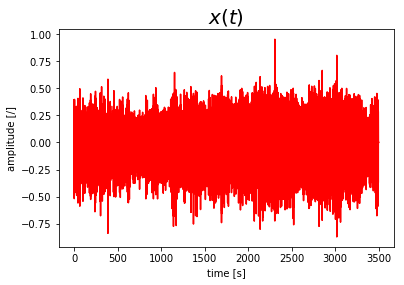

In [38]:
# We can also visualize the raw version, this can even handle the full length
plt.figure()
plt.plot(t, x, color = 'r')
plt.xlabel('time [s]')
plt.ylabel('amplitude [/]')
plt.title(r'$x(t)$', size=20);
plt.show()

In [43]:
# Above we selected a word in a tier and we extracted the data of the corresponding label
# Here we convert the corresponding start and end time into sample indices
samp_start = librosa.core.time_to_samples(t1)
samp_end = librosa.core.time_to_samples(t2)
samp_start, samp_end

(1388069, 1398433)

In [44]:
# Now play this part
Audio(x[samp_start:samp_end], rate=sampling_rate)

In [63]:
records = pd.DataFrame(columns = ["Name", "Year", "FN"])
records

,Name,Year,FN


In [73]:
rec = pd.DataFrame(["John Kelly", 1876, "JK76.wav"]).transpose()
rec.columns = ["Name", "Year", "FN"]
rec

,Name,Year,FN
0,John Kelly,1876,JK76.wav


In [78]:
records = records.append(rec, ignore_index = True)
records

,Name,Year,FN
0,John Kelly,1876,JK76.wav
1,John Kelly,1876,JK76.wav
2,John Kelly,1876,JK76.wav


# 3. Full script

Our goal here is to obtain a dataset for each used word of speaker - waveform pairs.

In [46]:
from collections import Counter

In [84]:
total_files = 0
used_words_and_counts = Counter()
speakers = set()

header = ["Speaker", "Word", "Year", "Filename"]
records = pd.DataFrame(columns = header)

for year in range(1998, 2014):
    # Processing year
    print("Processing year " + str(year))
    TEXTGRIDDIR = DATADIR + "/" + str(year) + "/aligned"
    MP3DIR = DATADIR + "/" + str(year) + "/mp3s"
    
    # Checking if the data is there
    if not (os.path.isdir(TEXTGRIDDIR) and os.path.isdir(MP3DIR)):
        print("Insufficient data for this year")
        continue
    
    textlst = os.listdir(TEXTGRIDDIR)
    mp3lst = os.listdir(MP3DIR)
    
    # Constructing the filenames that have both a corresponding aligned TextGrid and mp3
    filenames = []
    for fn in mp3lst:
        trunc = fn.split(".")[0]
        if any(trunc in s for s in textlst):
            filenames.append(trunc)

    print("Number of aligned TextGrid files with Audio: "+str(len(filenames)))
    total_files += len(filenames)
    
    for used_word in used_words:
        WORDDIR = WORKDIR + "/WordAudio/" + used_word
        if not os.path.isdir(WORDDIR):
            os.makedirs(WORDDIR)

    for k, filename in enumerate(filenames):    
        # Processing file
        print("   Processing: " + "[" + str(k+1) + " / " + str(len(filenames)) + "] " + filename)
        lm = LabelManager(from_file = TEXTGRIDDIR + "/" + filename + ".TextGrid", from_type='praat')
        audio, sampling_rate = librosa.load(MP3DIR + "/" + filename + ".mp3")
        word_tiers = [name for name in lm.names if name.split("-")[1].strip() == 'word']
        num_of_speakers = len(word_tiers)
        print("      Found " + str(num_of_speakers) + " speakers")
        for j, word_tier in enumerate(word_tiers):
            # Processing speaker
            speaker = word_tier.split("-")[0].strip()
            speakers.add(speaker)
            for l in range(len(lm.tier(word_tier))):
                # Processing word
                word = lm.tier(word_tier)[l].text
                if word in used_words:
                    fname = str(year) + "_" + word + str(used_words_and_counts[word]) + ".wav"
                    path = WORKDIR + "/WordAudio/" + word + "/" + fname
                    # Get location of word in audio file
                    start_sample = librosa.core.time_to_samples(lm.tier(word_tier)[l].t1, sr = sampling_rate)
                    end_sample = librosa.core.time_to_samples(lm.tier(word_tier)[l].t2, sr = sampling_rate)
                    word_audio = audio[start_sample:end_sample]
                    librosa.output.write_wav(path, word_audio, sr = sampling_rate)
                    used_words_and_counts[word] += 1
                    # Save record
                    rec = pd.DataFrame([speaker, word, year, fname]).transpose()
                    rec.columns = header
                    records = records.append(rec, ignore_index = True)
    
print("Total files: " + str(total_files))
print("Total speakers: " + str(len(speakers)))
    

Processing year 1998
Number of aligned TextGrid files with Audio: 38
   Processing: [1 / 38] 1998_98_84
      Found 11 speakers
   Processing: [2 / 38] 1998_96_1793
      Found 10 speakers
   Processing: [3 / 38] 1998_98_149
      Found 12 speakers
   Processing: [4 / 38] 1998_97_1121
      Found 11 speakers
   Processing: [5 / 38] 1998_98_470
      Found 11 speakers
   Processing: [6 / 38] 1998_98_10
      Found 12 speakers
   Processing: [7 / 38] 1998_97_1287
      Found 11 speakers
   Processing: [8 / 38] 1998_98_377
      Found 11 speakers
   Processing: [9 / 38] 1998_98_727
      Found 11 speakers
   Processing: [10 / 38] 1998_98_387
      Found 11 speakers
   Processing: [16 / 38] 1998_97_1147
      Found 12 speakers
   Processing: [17 / 38] 1998_98_404
      Found 12 speakers
   Processing: [18 / 38] 1998_98_531
      Found 12 speakers
   Processing: [19 / 38] 1998_98_223
      Found 12 speakers
   Processing: [20 / 38] 1998_98_591
      Found 12 speakers
   Processing: [21 / 38

   Processing: [39 / 50] 2003_02_1016
      Found 12 speakers
   Processing: [40 / 50] 2003_02_8286
      Found 11 speakers
   Processing: [41 / 50] 2003_02_473
      Found 11 speakers
   Processing: [42 / 50] 2003_02_1824
      Found 11 speakers
   Processing: [43 / 50] 2003_02_1794
      Found 10 speakers
   Processing: [44 / 50] 2003_02_1541
      Found 12 speakers
   Processing: [45 / 50] 2003_03_339
      Found 12 speakers
   Processing: [46 / 50] 2003_02_1667
      Found 12 speakers
   Processing: [47 / 50] 2003_02_458
      Found 11 speakers
   Processing: [48 / 50] 2003_02_10038
      Found 10 speakers
   Processing: [49 / 50] 2003_03_6821
      Found 11 speakers
   Processing: [50 / 50] 2003_03_6539
      Found 11 speakers
Processing year 2004
Number of aligned TextGrid files with Audio: 72
   Processing: [1 / 72] 2004_03_750
      Found 9 speakers
   Processing: [2 / 72] 2004_04_637
      Found 10 speakers
   Processing: [3 / 72] 2004_03_1039
      Found 9 speakers
   Process

      Found 11 speakers
   Processing: [40 / 43] 2006_05_85
      Found 11 speakers
   Processing: [41 / 43] 2006_06_313
      Found 10 speakers
   Processing: [42 / 43] 2006_04_1350
      Found 11 speakers
   Processing: [43 / 43] 2006_05_1256
      Found 10 speakers
Processing year 2007
Number of aligned TextGrid files with Audio: 46
   Processing: [1 / 46] 2007_06_637
      Found 10 speakers
   Processing: [2 / 46] 2007_06_571
      Found 10 speakers
   Processing: [3 / 46] 2007_06_1413
      Found 10 speakers
   Processing: [4 / 46] 2007_07_210
      Found 9 speakers
   Processing: [5 / 46] 2007_06_1181
      Found 10 speakers
   Processing: [6 / 46] 2007_134_orig
      Found 9 speakers
   Processing: [7 / 46] 2007_06_9130
      Found 9 speakers
   Processing: [8 / 46] 2007_07_455
      Found 10 speakers
   Processing: [9 / 46] 2007_07_343
      Found 11 speakers
   Processing: [10 / 46] 2007_07_371
      Found 11 speakers
   Processing: [11 / 46] 2007_07_5439
      Found 11 speake

      Found 9 speakers
   Processing: [17 / 59] 2009_08_1008
      Found 8 speakers
   Processing: [18 / 59] 2009_08_724
      Found 10 speakers
   Processing: [19 / 59] 2009_09_337
      Found 10 speakers
   Processing: [20 / 59] 2009_09_497
      Found 9 speakers
   Processing: [21 / 59] 2009_08_678
      Found 10 speakers
   Processing: [22 / 59] 2009_08_680
      Found 11 speakers
   Processing: [23 / 59] 2009_08_1134
      Found 11 speakers
   Processing: [24 / 59] 2009_09_367
      Found 10 speakers
   Processing: [25 / 59] 2009_09_475
      Found 9 speakers
   Processing: [26 / 59] 2009_08_728
      Found 11 speakers
   Processing: [27 / 59] 2009_08_1521
      Found 11 speakers
   Processing: [28 / 59] 2009_138%20ORIG
      Found 11 speakers
   Processing: [29 / 59] 2009_08_1555
      Found 11 speakers
   Processing: [30 / 59] 2009_08_1151
      Found 11 speakers
   Processing: [31 / 59] 2009_08_7621
      Found 9 speakers
   Processing: [32 / 59] 2009_08_1175
      Found 11 spe

      Found 10 speakers
   Processing: [40 / 65] 2011_10_1211
      Found 10 speakers
   Processing: [41 / 65] 2011_10_9995
      Found 10 speakers
   Processing: [42 / 65] 2011_11_564
      Found 11 speakers
   Processing: [43 / 65] 2011_10_444
      Found 11 speakers
   Processing: [44 / 65] 2011_10_1293
      Found 10 speakers
   Processing: [45 / 65] 2011_11_166
      Found 10 speakers
   Processing: [46 / 65] 2011_10_704
      Found 11 speakers
   Processing: [47 / 65] 2011_10_1491
      Found 11 speakers
   Processing: [48 / 65] 2011_10_1001
      Found 11 speakers
   Processing: [49 / 65] 2011_11_161
      Found 10 speakers
   Processing: [50 / 65] 2011_11_5683
      Found 11 speakers
   Processing: [51 / 65] 2011_10_699
      Found 10 speakers
   Processing: [52 / 65] 2011_11_88
      Found 11 speakers
   Processing: [53 / 65] 2011_10_1265
      Found 10 speakers
   Processing: [54 / 65] 2011_10_1016
      Found 10 speakers
   Processing: [55 / 65] 2011_10_875
      Found 10 sp

In [89]:
records.to_csv(WORKDIR + "/raw_wave_word.csv")

In [86]:
used_words_and_counts

Counter({'ARGUMENT': 7037,
         'CONGRESS': 10353,
         'EVIDENCE': 5635,
         'FEDERAL': 10710,
         'GOVERNMENT': 7919,
         'HONOR': 11484,
         'ISSUE': 6635,
         'JUSTICE': 16526,
         'SCIENCE': 94,
         'TAXATION': 93})

In [90]:
records

,Speaker,Word,Year,Filename
0,sandra day oconnor,ARGUMENT,1998,1998_ARGUMENT0.wav
1,sandra day oconnor,FEDERAL,1998,1998_FEDERAL0.wav
2,sandra day oconnor,ARGUMENT,1998,1998_ARGUMENT1.wav
3,sandra day oconnor,FEDERAL,1998,1998_FEDERAL1.wav
4,david h souter,GOVERNMENT,1998,1998_GOVERNMENT0.wav
5,david h souter,JUSTICE,1998,1998_JUSTICE0.wav
6,david h souter,ISSUE,1998,1998_ISSUE0.wav
7,antonin scalia,EVIDENCE,1998,1998_EVIDENCE0.wav
8,antonin scalia,EVIDENCE,1998,1998_EVIDENCE1.wav
9,antonin scalia,FEDERAL,1998,1998_FEDERAL2.wav
